In [2]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


# Are out-of-state students more likely to recommend this class than in-state students?

Read data and organize into rows, then organize into columns using read_csv_rows and columnar functions

In [3]:
from data_utils import read_csv_rows, columnar, head, select, count, column_values

row_data: list[dict[str, str]] = read_csv_rows("../../data/survey.csv")
column_data: dict[str, list[str]] = columnar(row_data)
print(head(column_data, 2))
just_columns_iwant: dict[str, list[str]] = select(column_data, ["residency", "would_recommend"])
print(head(just_columns_iwant, 10))

{'row_number': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', 

Making masks for my selected column of "residency"

In [4]:
from data_utils import masks
store_out: list[bool] = masks(just_columns_iwant["residency"], "Out-of-state")
store_in: list[bool] = masks(just_columns_iwant["residency"], "In-state")
print(store_out)
print(store_in)

[True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, F

Give number of out-of-state residents and number of in-state residents who would recommend this class

In [5]:
from data_utils import compare
outie: int = compare(store_out, just_columns_iwant["would_recommend"], 5)
print(outie)
innie: int = compare(store_in, just_columns_iwant["would_recommend"], 5)
print(innie)

71
318


Number of total out-of-state residents and total in-state residents

In [6]:
total: dict[str, int] = count(just_columns_iwant["residency"])
print(total)

{'Out-of-state': 86, 'In-state': 416}


Percent of out of state students that would recommend class vs. percent of in state students that would recommend class

In [8]:
perc_out: float = outie / total["Out-of-state"]
perc_in: float = innie / total["In-state"]
print(f"The percent of out-of-state students that would recommend Comp 110 is {perc_out * 100}%")
print(f"The percent of in-state students that would recommend Comp 110 is {perc_in * 100}%")

The percent of out-of-state students that would recommend Comp 110 is 82.55813953488372%
The percent of in-state students that would recommend Comp 110 is 76.4423076923077%


Table that shows total numbers of in-state and out-of-state students in class as well as how many would recommend the class, as well as the percent of each.

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Total')

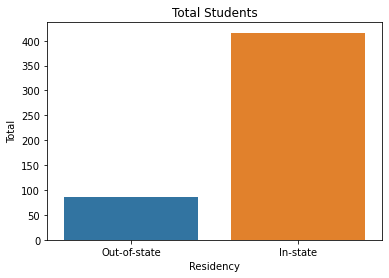

In [36]:
sns.barplot(x=["Out-of-state", "In-state"], y= [86, 416])
plt.title("Total Students")
plt.xlabel("Residency")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

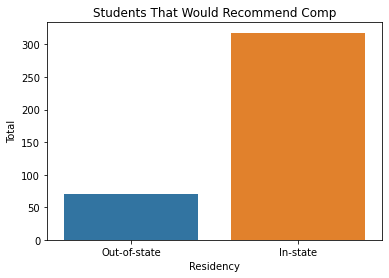

In [37]:
sns.barplot(x=["Out-of-state", "In-state"], y=[71, 318])
plt.title("Students That Would Recommend Comp")
plt.xlabel("Residency")
plt.ylabel("Total")

Text(0, 0.5, 'Percent of Students')

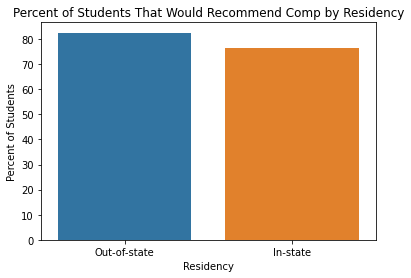

In [38]:
sns.barplot(x=["Out-of-state", "In-state"], y=[82.558, 76.442])
plt.title("Percent of Students That Would Recommend Comp by Residency")
plt.xlabel("Residency")
plt.ylabel("Percent of Students")

My initial posit was whether out-of-state or in-state students were more likely to recommend taking Comp110. I decided a rating of 5 or higher on a scale of 1-7 likeliness to recommend would classify as "would recommend". I found that 82.558% of out-of-state students would recommend it compared to 76.442% of in-state students. I also found, interestingly, that the percentage of out of state students relative to in-state students total in the class is almost an exact representation of the university's in-state vs. out-of-state makeup. UNC is 82% in state and the class is 82.8% in state. This was found by taking total out of state residents (416) divided by in-state + out of state residents (86+416). Interpreting the data is not clear, what does it mean that a higher percentage of out-of-state students would recommend the class than in-state students. Is it a reflection of out-of-state students believing they will perform better in terms of final grade? Is it a reflection of the interest out of state students show towards comp-sci compared to in-state students? This could be futhered with more analysis....but it is Thursday April 8th at 5:30pm, so I will let that rest for now.